In [63]:
import pandas as pd

In [64]:
features = pd.read_csv('temps.csv')
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [65]:
print('shape of the features:', features.shape)

shape of the features: (348, 9)


In [66]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.511494,62.560345,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,11.813019,11.767406,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,92.000000,92.000000,77.400000,92.000000,95.000000


In [8]:
features.count()

year       348
month      348
day        348
week       348
temp_2     348
temp_1     348
average    348
actual     348
friend     348
dtype: int64

In [9]:
import datetime

years = features['year']
months = features['month']
days = features['day']

#convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

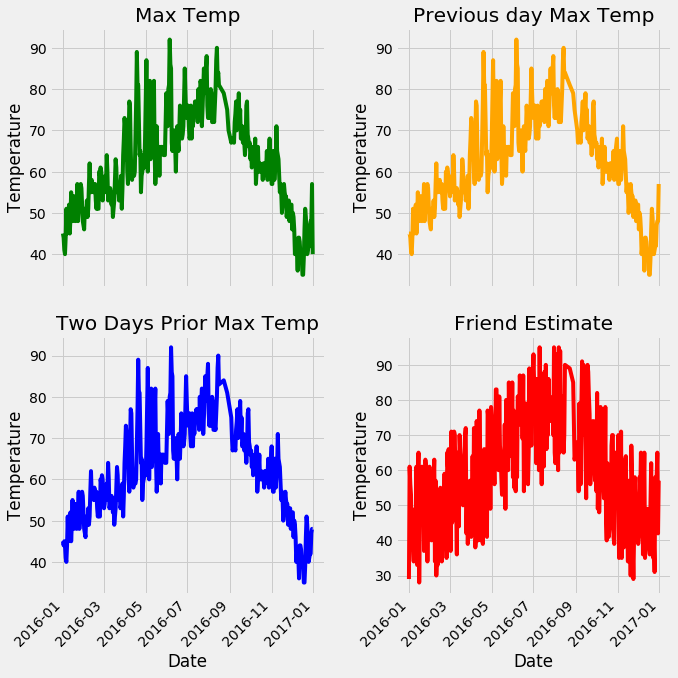

In [19]:
#plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation = 45) #Displays date in a presentable way to avoid overlapping

#max temperature measurement
ax1.plot(dates, features['actual'], color='green')
ax1.set_xlabel(''); ax1.set_ylabel('Temperature'); ax1.set_title('Max Temp')

#Temperature from 1 day ago
ax2.plot(dates, features['temp_1'], color='orange')
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous day Max Temp')

#Temperature from 2 days ago
ax3.plot(dates, features['temp_2'], color='blue')
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

#Friend Estimate
ax4.plot(dates, features['friend'], color='red')
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)#makes sure the graph is displayed within the area and does not

In [11]:
#One-hot encoding 
'''
The first step for us is known as one-hot encoding of the data. 
This process takes categorical variables, such as days of the week and converts it to a numerical representation 
without an arbitrary ordering. Days of the week are intuitive to us because we use them all the time. 
You will (hopefully) never find anyone who doesn’t know that ‘Mon’ refers to the first day of the workweek, 
but machines do not have any intuitive knowledge. 
What computers know is numbers and for machine learning we must accommodate them. 
We could simply map days of the week to numbers 1–7, but this might lead to the algorithm placing more importance 
on Sunday because it has a higher numerical value. Instead, we change the single column of weekdays into seven 
columns of binary data. 
'''

# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)

# Display the first 5 rows 
features.iloc[:,5:].head(5)

,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,29,1,0,0,0,0,0,0
1,45.7,44,61,0,0,1,0,0,0,0
2,45.8,41,56,0,0,0,1,0,0,0
3,45.9,40,53,0,1,0,0,0,0,0
4,46.0,44,41,0,0,0,0,0,1,0


In [12]:
features.head()

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [13]:
print('shape of the features:', features.shape)

shape of the features: (348, 15)


In [14]:
import numpy as np

#the values we want to predict
labels = np.array(features['actual'])

# Remove the labels from the features, axis 1 refers to the columns
features= features.drop('actual', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [19]:
#TESTING AND TRAINING SETS

from sklearn.model_selection import train_test_split

#to split the data into training and testing models
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [20]:
#To print training data features and labels

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)

Training Features Shape: (261, 14)
Training Labels Shape: (261,)


In [21]:
#To print testing data features and labels

print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Testing Features Shape: (87, 14)
Testing Labels Shape: (87,)


In [22]:
#BASELINE PREDICTION
    
# They are nothing but the historical averages
baseline_preds = test_features[:, feature_list.index('average')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

Average baseline error:  5.06 degrees.


In [26]:
#TRAIN MODEL

from sklearn.ensemble import RandomForestRegressor

#instantiate model
RF = RandomForestRegressor(n_estimators = 1000, random_state = 42)

#to train the model on training data
RF.fit(train_features, train_labels);

In [27]:
#Predictions on test data
prediction = RF.predict(test_features)
errors = abs(prediction - test_labels) #to calculate absolute error

#mean absolute error
print('Mean Absolute Error:', round(np.mean(errors),2), 'degrees')


Mean Absolute Error: 3.83 degrees


In [28]:
#Determining the performance metrics

#Mean Absolute Percentage Error(MAPE)
mape = 100 * (errors / test_labels)

#calculate accuracy

accuracy = 100 - np.mean(mape)
print('accuracy:', round(np.mean(accuracy),2), '%')

accuracy: 93.99 %


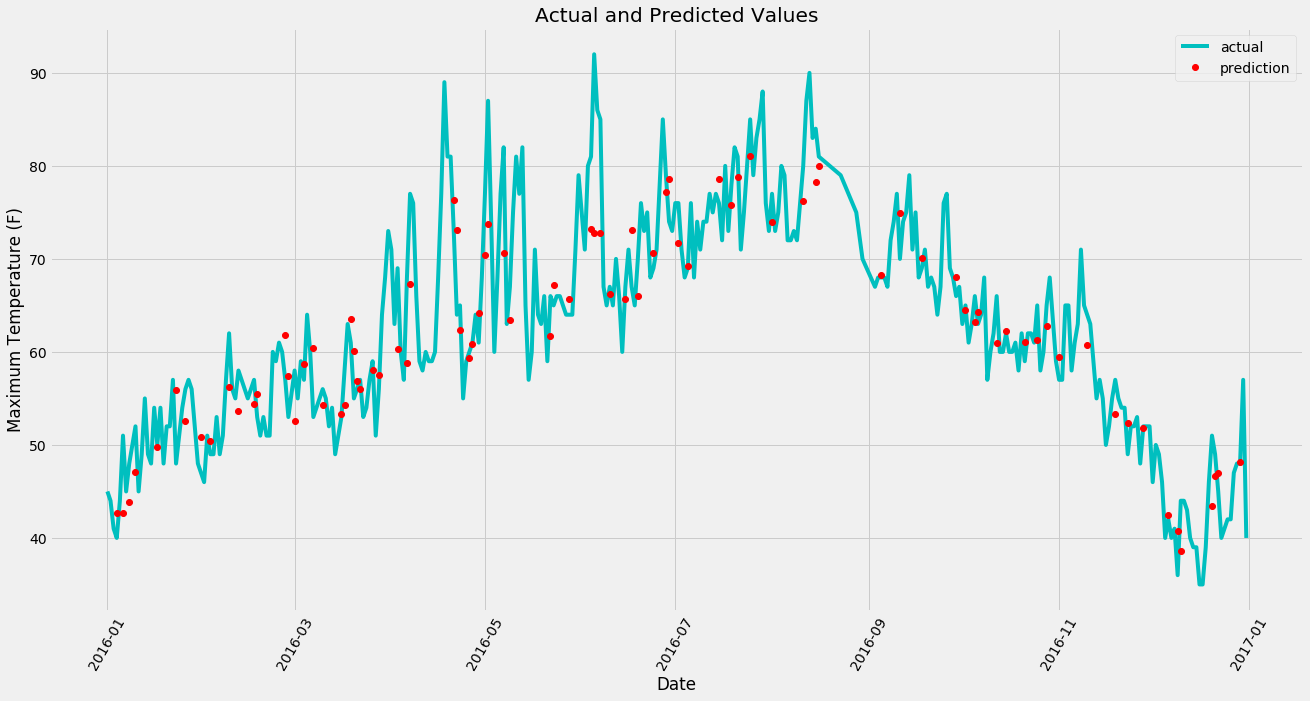

In [59]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))

import datetime

# Dates of training values

months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

# List and then convert to datetime object

dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, 
         day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Dataframe with true values and dates

true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# Dates of predictions

months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]

# Column of dates

test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, 
              day in zip(years, months, days)]

# Convert to datetime objects

test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

# Dataframe with predictions and dates

predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': prediction})

# Plot the actual values

plt.plot(true_data['date'], true_data['actual'], 'c-', label = 'actual')

# Plot the predicted values

plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels

plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

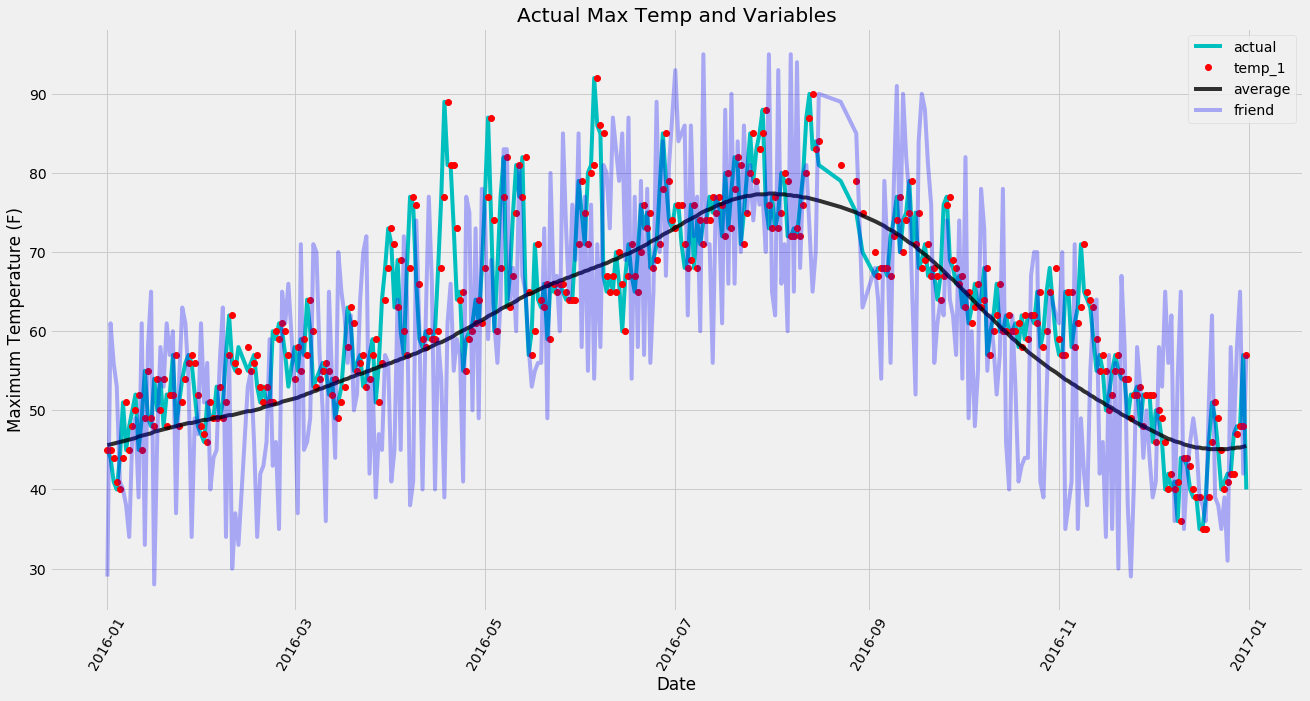

In [60]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))

# Make the data accessible for plotting
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]

# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'c-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'ro', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'b-', label = 'friend', alpha = 0.3)

# Formatting plot
plt.legend(); plt.xticks(rotation = '60');

# Lables and title
plt.xlabel('Date'); 
plt.ylabel('Maximum Temperature (F)'); 
plt.title('Actual Max Temp and Variables');


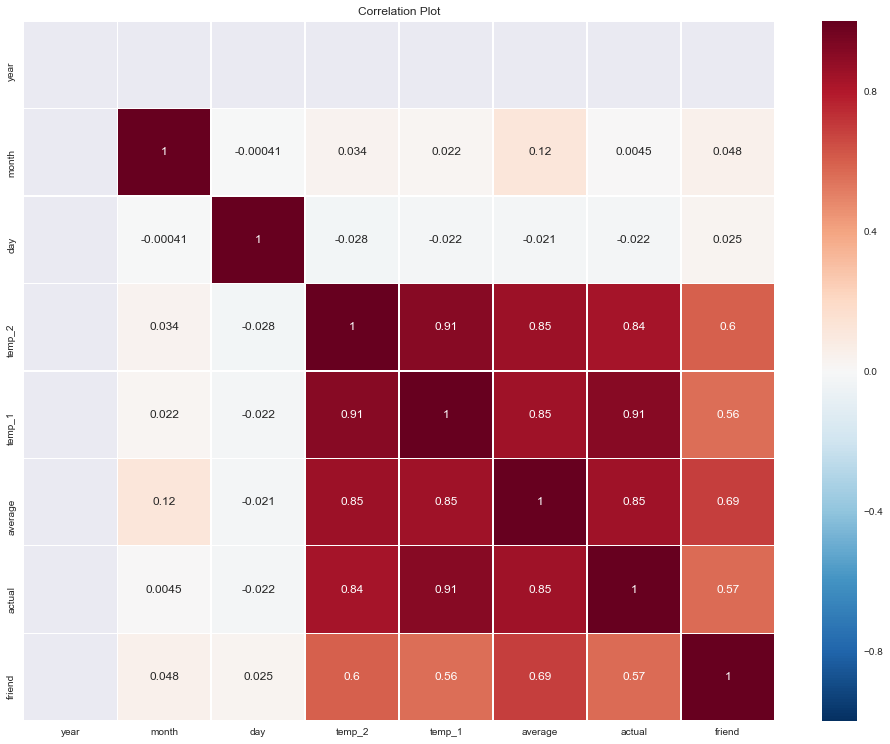

In [70]:
corr = feature.corr()

import seaborn as sns

fig=plt.gcf()
fig.set_size_inches(15,12)
sns.plt.title("Correlation Plot")
sns.heatmap(corr, annot=True, linewidths=0.3)